# Text Sentiment Analysis for restaurants using Yelp dataset

Importing the libraries

In [9]:
# Importing the libraries
import swifter
import pandas as pd

/Users/dathd6/Developments/DeliSA/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Download NLTK resources

In [10]:
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/dathd6/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/dathd6/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dathd6/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Importing data

Get customer's reviews

In [16]:
from constants import DATASET_FOLDER, REVIEW_DATASET, BUSSINESS_DATASET
from utils import stream_json

reviews = stream_json(f'{DATASET_FOLDER}/{REVIEW_DATASET}')
df_v = pd.DataFrame(reviews)
df_v = df_v[['business_id', 'text', 'stars', 'date']]
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   business_id  object 
 1   text         object 
 2   stars        float64
 3   date         object 
dtypes: float64(1), object(3)
memory usage: 213.3+ MB


Get bussiness data and merge it with reviews

In [ ]:
MAX_NUMBER_BUSINESS = 70000 

business = stream_json(f'{DATASET_FOLDER}/{BUSSINESS_DATASET}', chunk_size=MAX_NUMBER_BUSINESS)
df_b = pd.DataFrame(business)
df_b = df_b.dropna(subset=['attributes'])
df_b['attr_str'] = df_b['attributes'].astype(str)
df_b['overall_stars'] = df_b['stars']
df_b = df_b[df_b['attr_str'].str.contains('Restaurants')]
df_b = df_b[['business_id', 'name', 'address', 'overall_stars']]
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43819 entries, 2 to 69998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_id    43819 non-null  object 
 1   name           43819 non-null  object 
 2   address        43819 non-null  object 
 3   overall_stars  43819 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
df = pd.merge(df_b, df_v, on='business_id', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2782263 entries, 0 to 2782262
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   business_id    object 
 1   name           object 
 2   address        object 
 3   overall_stars  float64
 4   text           object 
 5   stars          float64
 6   date           object 
dtypes: float64(2), object(5)
memory usage: 148.6+ MB


### Data Pre-Processing

In [ ]:
from utils import preprocess_text, assign_sentiment

df['sentiment'] = df['stars'].apply(assign_sentiment)
df['processed_review'] = df['text'].swifter.apply(preprocess_text)

Pandas Apply: 100%|██████████| 2782263/2782263 [52:28<00:00, 883.60it/s]  


### Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from models.sentiment_classifier import SentimentClassifier

PARAMS = [
    dict(
        n_estimators=100,
        min_samples_split=2,
        min_samples_leaf=1,
        verbose=2,
        max_depth=None,
        n_jobs=-1
    ),
    dict(
        n_estimators=100,
        min_samples_split=10,
        min_samples_leaf=1,
        verbose=2,
        max_depth=None,
        n_jobs=-1
    )
]
VECTORIZERS = [
    CountVectorizer(min_df=0.01),
    TfidfVectorizer(use_idf=True)
]
classifiers = []

for i in range(2):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(df['processed_review'], df['sentiment'], test_size=0.2, random_state=50)

    clf = SentimentClassifier(
        classifier=RandomForestClassifier,
        params=PARAMS[i]
    )

    vectorizer = VECTORIZERS[i]
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    clf.fit(X_train, y_train)
    clf.predict(X_test)
    clf.calculate_metrics(y_test)

    classifiers.append(clf)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 93.8min


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 293.9min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 49.9min


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 161.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    6.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   20.6s finished


Choosing second models with higher accuracy

In [ ]:
for clf in classifiers:
    print(clf.metrics)

0.8786150851913819
0.8794363585064686


In [ ]:
clf = classifiers[1]
vectorizer = VECTORIZERS[1]
print(clf.classifier)
print(vectorizer)

RandomForestClassifier(min_samples_split=10, n_jobs=-1, verbose=2)
TfidfVectorizer()


### Retrieve Feature Importances

In [ ]:
importances = clf.classifier.feature_importances_

### Match feature importances with words

In [ ]:
# Get the vocabulary from the vectorizer
vocab = vectorizer.get_feature_names_out()

# Create a dictionary mapping words to their importances
word_importances = dict(zip(vocab, importances))

# Sort the words by their importance
sorted_word_importances = sorted(word_importances.items(), key=lambda x: x[1], reverse=True)

# Display the results
for word, importance in sorted_word_importances:
    print(f"{word}: {importance}")


great: 0.012668304038578713
delici: 0.01171311753427704
worst: 0.009043383896068893
best: 0.007271174841696953
amaz: 0.007066094887993952
love: 0.006979847225325078
terribl: 0.00671331645407806
rude: 0.006671538392200285
wa: 0.006498117773120907
ok: 0.0057833524595075105
horribl: 0.005687371190165892
order: 0.0054489617627522325
ask: 0.005344585179351825
bad: 0.004887204246249617
definit: 0.004851910128396064
told: 0.004783562648735984
bland: 0.004549316725391549
friendli: 0.004525769621702139
minut: 0.004393097932709647
perfect: 0.004385056832086455
noth: 0.004269016115417107
said: 0.004231003756809229
favorit: 0.004197699623972835
excel: 0.004123685612542424
recommend: 0.0038720415246181255
awesom: 0.003658583098671725
mediocr: 0.003630908268309821
manag: 0.003608113973684827
disappoint: 0.003422141425150329
would: 0.003421651364359749
okay: 0.003395470981509654
aw: 0.0032443958187130246
money: 0.0032026923848346833
lack: 0.003175506143253333
like: 0.003086236025086449
poor: 0.003053

### Function to get polarity scores of each word in list of reviews

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter

# List reviews and the predicted sentiment are parameters
def calc_polarity_score(reviews, y_pred):
    num_reviews = len(reviews)
    word_frequencies = {word: 0 for word in word_importances.keys()}
    polarity_scores = {word: 0 for word in word_importances.keys()}

    # Count the word frequencies (rate that word appear in each review)
    for index in range(num_reviews):
        tokens = word_tokenize(reviews.iloc[index])
        for word in tokens:
            if word_frequencies.get(word) != None:
                word_frequencies[word] = word_frequencies[word] + 1

    # Polarity score = word polarity * sentiment (1 or -1) * count * word importance * word frequency
    for index in range(num_reviews):
        tokens = word_tokenize(reviews.iloc[index])
        word_counts = Counter(tokens)

        for word, count in word_counts.items():
            if polarity_scores.get(word) != None:
                polarity_scores[word] = polarity_scores[word] + (1 if y_pred[index] == 1 else -1) * count * word_importances[word] * word_frequencies[word]
    
    return polarity_scores

### Function to plot polarity scores

In [20]:
import matplotlib.pyplot as plt

def plot_word_polarity(data):
    # Unpack the list of tuples
    words, values = zip(*data)

    # Create the plot
    plt.figure(figsize=(8, 6))  # You can adjust the figure size as needed
    plt.bar(words, values, color='skyblue')  # Create a bar chart

    plt.xlabel('Words')  # Label for x-axis
    plt.ylabel('score')  # Label for y-axis
    plt.title('Polarity scores')  # Title of the plot

    # Display the plot
    plt.tight_layout()  # Adjust layout to not cut off labels
    plt.show()

## Global sentiment analysis (Test data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_review'], df['sentiment'], test_size=0.2, random_state=50)
vec_X_test = vectorizer.transform(X_test)
y_pred = clf.predict(vec_X_test)
polarity_scores = calc_polarity_score(X_test, y_pred)

In [ ]:
SENTIMENT_ADJECTIVES = ['minut', 'guess', 'mayb', 'enjoy', 'thi', 'wa', 'walk', 'food', 'well', 'love', 'veri', 'tri', 'also', 'one', 'back', 'would', 'nice', 'realli', 'favorit', 'amaz', 'go', 'definit', 'get', 'alway', 'recommend', 'order', 'best', 'like', 'place', 'delici', 'said', 'ask', 'told', 'bad', 'call', 'worst', 'terribl', 'ok', 'horribl', 'good', 'great', 'amazing', 'fantastic', 'bad', 'terrible', 'awful', 'poor']

sorted_polarity_scores = sorted(polarity_scores.items(), key=lambda x: x[1], reverse=True)
# Regularization
_, highest_score = sorted_polarity_scores[0]
filtered_polarity_scores = [(word, score / highest_score) for word, score in sorted_polarity_scores if not word in SENTIMENT_ADJECTIVES]
# Get top 5 and bottom 5
bottom_5 = filtered_polarity_scores[-5:]
top_5 = filtered_polarity_scores[:5]
print(bottom_5)
print(top_5)

[('money', -0.00021696650688728241), ('custom', -0.0004699767986459687), ('rude', -0.0006795932693168548), ('manag', -0.0009991833640099934), ('minut', -0.002169849086573046)]
[('friendli', 0.011287277093875286), ('servic', 0.010488147609909012), ('time', 0.01013020396633112), ('fresh', 0.0036369037016536388), ('staff', 0.003149795156363021)]


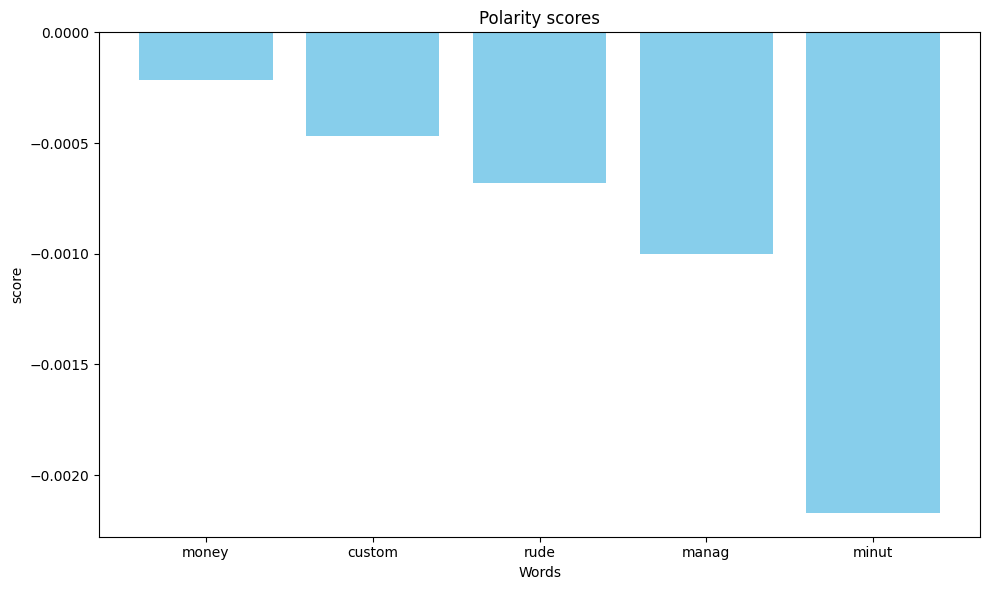

In [ ]:
plot_word_polarity(bottom_5)

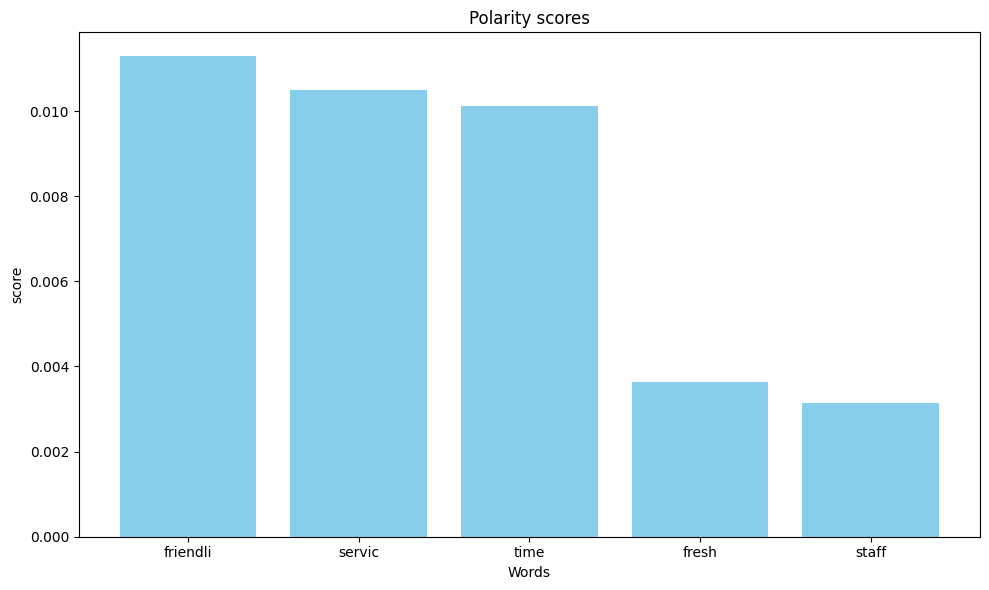

In [ ]:
plot_word_polarity(top_5)

## Sentiment analysis of Cuenelli's Peruvian Restaurant (United States)

In [159]:
print(df[df['business_id'] == 'Mha77MN_BYGB-w7DONZ5YA'].iloc[0]['name'])
processed_reviews = df[df['business_id'] == 'Mha77MN_BYGB-w7DONZ5YA']['text'].swifter.apply(preprocess_text)
vec_processed_reviews = vectorizer.transform(processed_reviews)
y_pred = clf.predict(vec_processed_reviews)

Cuenelli's Peruvian Restaurant


Pandas Apply: 100%|██████████| 261/261 [00:00<00:00, 426.43it/s]
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


In [158]:
polarity_scores = calc_polarity_score(processed_reviews, y_pred)

sorted_polarity_scores = sorted(polarity_scores.items(), key=lambda x: x[1], reverse=True)
# Regularization
_, highest_score = sorted_polarity_scores[0]
filtered_polarity_scores = [(word, score / highest_score) for word, score in sorted_polarity_scores if not word in SENTIMENT_ADJECTIVES]
# Get top 5 and bottom 5
bottom_5 = filtered_polarity_scores[-5:]
top_5 = filtered_polarity_scores[:5]
print(bottom_5)
print(top_5)

[('bill', -1.425245057121803e-05), ('beer', -1.8631710566962205e-05), ('rude', -2.5452125125832065e-05), ('charg', -4.7875843745601034e-05), ('pay', -6.479393197721563e-05)]
[('chicken', 0.09669857754574399), ('rice', 0.01385537431015388), ('sauc', 0.013509707661168898), ('servic', 0.012174757291712716), ('fri', 0.011997600675057602)]


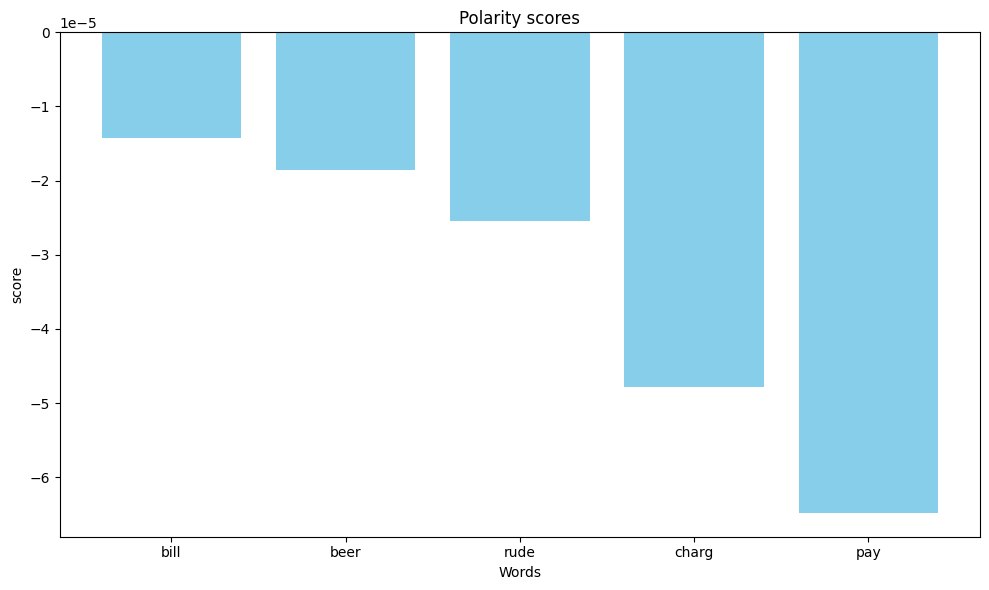

In [14]:
plot_word_polarity(bottom_5)

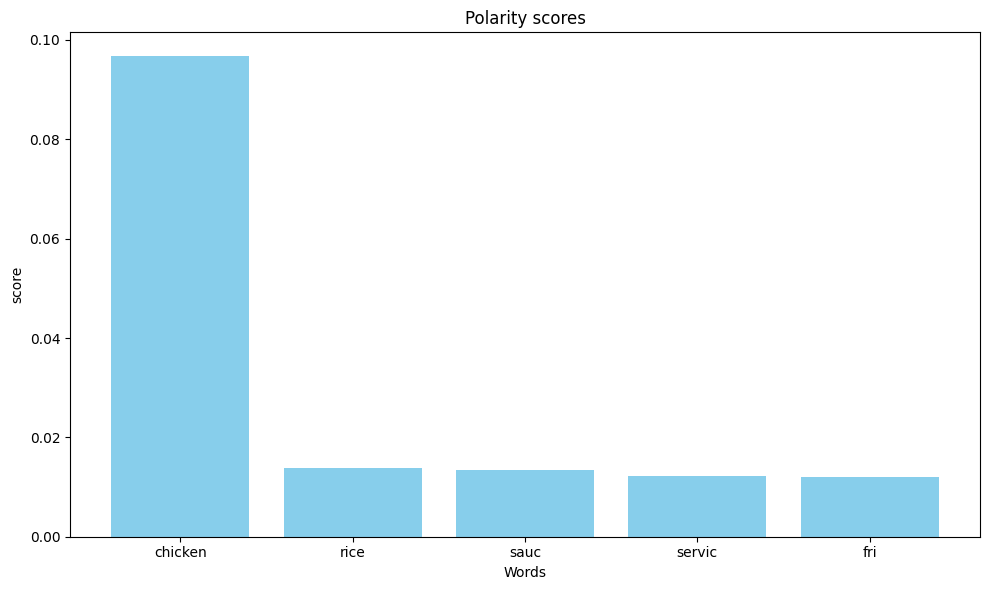

In [15]:
plot_word_polarity(top_5)